In [1]:
import pandas as pd

## Merge 12 months of sales data (`.csv` files) into a since `.csv` file

In [2]:
import os

sales_data_dir = 'original_data/SalesAnalysis/Sales_Data/'
output_data_dir = 'original_data/SalesAnalysis/Output/'

# Create empty dataframe
df = pd.DataFrame()

# Concatenate all .csv files to main dataframe (df)
for file in os.listdir(sales_data_dir):
    df_i = pd.read_csv(sales_data_dir + file)
    
    # The original csv files contain the column header row in multiple places.
    # To fix that in the merged dataframe we need to filter them out as follows.
    filter = df_i['Order ID'] == 'Order ID'
    df_i = df_i[~filter]
    
    df = pd.concat([df, df_i], axis='index', ignore_index=True)

# Write dataframe (df) to csv 
df.to_csv(output_data_dir + 'Sales_Merged_2019.csv', index=False)

# df.head()

df.shape

(186495, 6)

***

## Question 1: What was the best month for sales? How much was earned in that month?

Basic steps:
- Handle **missing values**
- Check column **dtypes** and modify where needed, including setting 'Order Date' to 'datetime' type.
- **Set index** if needed.
- Create **'Order Month'** column from 'Order Date'
- Create **'Sale Revenue'** column --> 'Sale Revenue' = 'Quantity Ordered' * 'Price Each'
- **Groupby 'Order Month'**
- Find out **'Order Month' with highest 'Sale Revenue'** using:
    - .sum() method, and/or
    - bar plot

In [3]:
df.dropna(inplace=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186490,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186491,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186492,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186493,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [5]:
# Convert the 'Order Date' column to 'datetime' dtype
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')        # You could also do this without 'format='
df['Order Date']

0        2019-04-19 08:46:00
2        2019-04-07 22:30:00
3        2019-04-12 14:38:00
4        2019-04-12 14:38:00
5        2019-04-30 09:27:00
                 ...        
186490   2019-09-17 20:56:00
186491   2019-09-01 16:00:00
186492   2019-09-23 07:39:00
186493   2019-09-19 17:30:00
186494   2019-09-30 00:18:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

In [6]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [7]:
# Cast data types of other columns, where needed
df = df.astype({'Order ID': 'int64', 'Quantity Ordered': 'int64', 'Price Each': 'float'})
df.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [8]:
# Set index to 'Order ID'
df.set_index('Order ID', inplace=True)
df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"


<p style="color:blue";> LEARNING POINT </p>

To **create the 'Order Month' column**, we can use `DataFrame[<datetime_column>].dt.month` to extract the month from a `datetime64` column:

In [9]:
df['Order Month'] = df['Order Date'].dt.month
df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
Order ID,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9


We will then **create the 'Sale Revenue' column**:

In [10]:
df['Sale Revenue'] = df['Quantity Ordered'] * df['Price Each']
df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sale Revenue
Order ID,,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00


In [11]:
# Final check on dtypes
df.dtypes

Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Order Month                  int64
Sale Revenue               float64
dtype: object

Now we can group the dataframe by 'Order Month' and find out the highest 'Sale Revenue' for each month using:
- SeriesGroupBy.sum() method
- Bar plots

In [12]:
# Create month group
month_grp = df.groupby('Order Month')

In [13]:
# SeriesGroupBy.sum() method to find month with highest sales
month_grp['Sale Revenue'].sum()

Order Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sale Revenue, dtype: float64

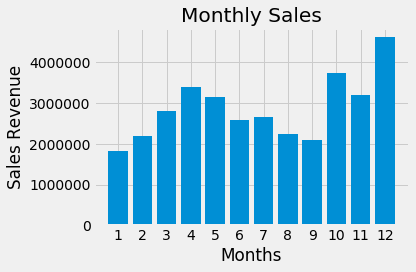

In [14]:
# Bar plots to find month with highest sales
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

ord_mth = month_grp['Sale Revenue'].sum().index
sales = month_grp['Sale Revenue'].sum()

ax.bar(ord_mth, sales)

ax.set_title('Monthly Sales')
ax.set_xlabel('Months')
ax.set_ylabel('Sales Revenue')

# To show x-axis tick labels for each month
ax.set_xticks(range(1,13))

plt.tight_layout()

### Answer 1: So, the month with the highest sales is December. The sales for December is 4,613,443.

***

## Question 2: What city had the highest sales in 2019?

In [15]:
df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sale Revenue
Order ID,,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00


Now, we want to create a new column for called **'Purchase City'**, but we also need to be careful that **in US city names do duplicate**, and that is the case in this dataset.

So, if the **'Purchase Address' is '917 1st St, Dallas, TX 75001'**, we want the **'Purchase City' to be 'Dallas (TX)'**

In [16]:
# Function to get city and state in the required format: Dallas (TX)
def get_city(address):
    city = address.split(',')[1].strip()
    state = address.split(',')[2].strip()[0:2]
    return f'{city} ({state})'

# Create new series for 'Purchase City' using .apply() and the get_city() function
df['Purchase City'] = df['Purchase Address'].apply(get_city)
df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sale Revenue,Purchase City
Order ID,,,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)


In [17]:
# Create city group
city_grp = df.groupby('Purchase City')

In [18]:
# SeriesGroupBy.sum() method to find the city with highest sales
city_grp['Sale Revenue'].sum()

Purchase City
Atlanta (GA)          2.795499e+06
Austin (TX)           1.819582e+06
Boston (MA)           3.661642e+06
Dallas (TX)           2.767975e+06
Los Angeles (CA)      5.452571e+06
New York City (NY)    4.664317e+06
Portland (ME)         4.497583e+05
Portland (OR)         1.870732e+06
San Francisco (CA)    8.262204e+06
Seattle (WA)          2.747755e+06
Name: Sale Revenue, dtype: float64

You can see above that there were 2 Portlands in the dataframe. And that is why we added the States.

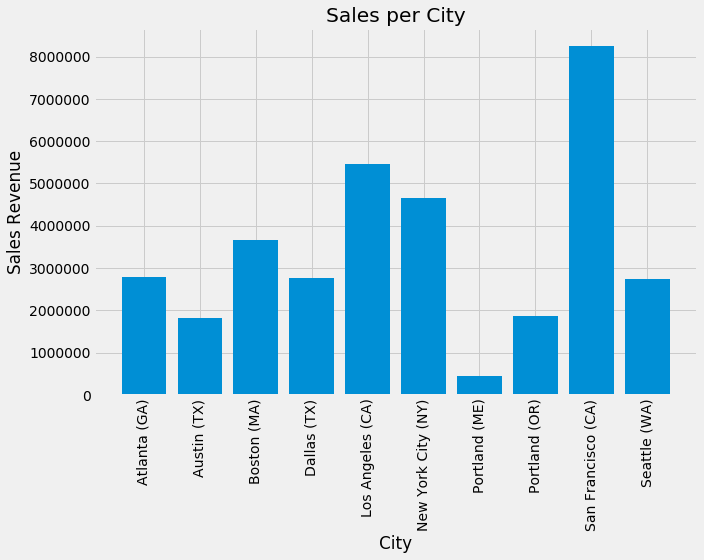

In [19]:
# Bar plots to find the city with highest sales

fig, ax = plt.subplots()

city = city_grp['Sale Revenue'].sum().index
sales = city_grp['Sale Revenue'].sum()

ax.bar(city, sales)

ax.set_title('Sales per City')
ax.set_xlabel('City')
ax.set_ylabel('Sales Revenue')

# To rotate x-axis tick-labels
plt.xticks(rotation=90)

# Increase figure size
fig.set_size_inches(10, 8)

plt.tight_layout()

### Answer 2: So, the city with the highest sales is San Francisco. The sales for San Franciso is 8,262,204.

***

## Question 3: At what time of the day should we display advertisements to maximize the likelihood of customers buying our products?

In [20]:
df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sale Revenue,Purchase City
Order ID,,,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)


Let's make a **histogram for '# of orders' vs 'hour of the day'** to get an idea of the hours when the most orders are placed.

In [21]:
# Create order hour column
df['Order Hour'] = df['Order Date'].dt.hour
df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sale Revenue,Purchase City,Order Hour
Order ID,,,,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20
259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16
259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7


In [22]:
df.dtypes

Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Order Month                  int64
Sale Revenue               float64
Purchase City               object
Order Hour                   int64
dtype: object

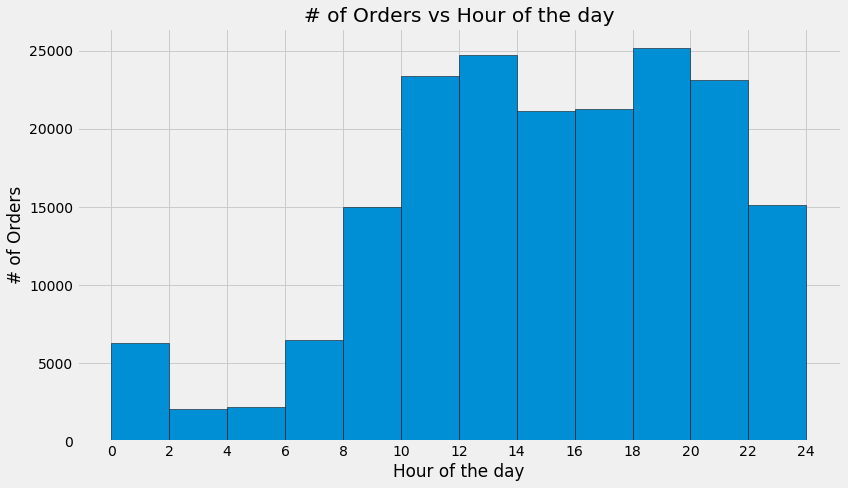

In [23]:
# Histogram for '# of orders' versus 'hour of the day'

fig, ax = plt.subplots()

hour = df['Order Hour']
hour_bins= [0,2,4,6,8,10,12,14,16,18,20,22,24]

ax.hist(hour, bins=hour_bins, edgecolor='black')

ax.set_title('# of Orders vs Hour of the day')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('# of Orders')

# To rotate x-axis tick-labels
plt.xticks(hour_bins)

# Increase figure size
fig.set_size_inches(12, 7)

plt.tight_layout()

### Answer 3: So, it looks like the best times to display advertisements would be 10-12, and 18-20. 

***

## Question 4: Which (two) products are most often sold together?

<p style="color:blue";> LEARNING POINT </p>

The answer to this entire question is a good learning point. The key things learned/reviewed are:
- `Series.duplicated(keep=)` method to find duplicated values in a series,
- `SeriesGroupBy.transform(<func>)` to call a function producing a "like-indexed" Series on each group, and return a Series having the same indexes as the original object filled with the transformed values,
- `DataFrame.drop_duplicates()` to drop duplicate rows in a dataframe,
- `itertools.combinations(<iterable>, r)` to find all possible combinations of ***r*** elements in an iterable,
- `collections.Counter(<iterable>)` to create a container that stores elements as dictionary keys, and their counts are stored as dictionary values, and
- `collections.Counter().update()` to update counts in a `Counter()` object.

**Hint: We identify products that were sold together by looking for duplicate 'Order ID's.

#### Stage 1: We want to end up with a dataframe that looks like this:

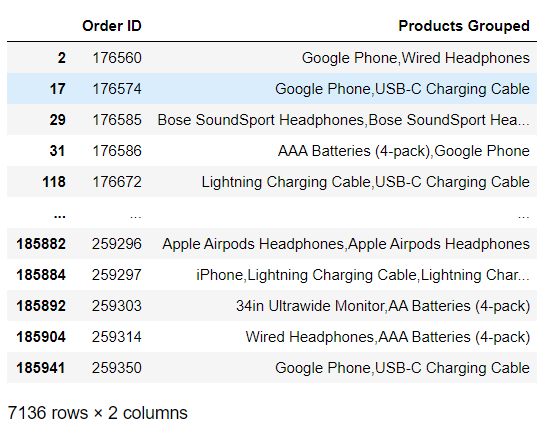

Note that in the table above:
- All the 'Order ID' values are those that were duplicated in the original dataframe (had multiple products sold with same 'Order ID'). In this table, the duplicate 'Order ID' values are removed.
- The individual 'Product' values, for each duplicate 'Order ID' in the original dataframe, are 'joined' with a "," in between.

In [24]:
df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sale Revenue,Purchase City,Order Hour
Order ID,,,,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20
259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16
259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7


In [25]:
df = df.reset_index()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sale Revenue,Purchase City,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17


Let's **filter the duplicate orders** from the original dataframe (`df`) and assign this filtered dataframe to a new dataframe (`df_do`):

In [26]:
# Create dataframe for duplicate orders only (df_do)
df_do = df[df['Order ID'].duplicated(keep=False)]           # 'keep=False' would keep ALL duplicates (not just first or last)
df_do

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sale Revenue,Purchase City,Order Hour
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11
...,...,...,...,...,...,...,...,...,...,...
185893,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20
185904,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0
185905,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0
185941,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13


Now, we want to create a **'Products Grouped'** column in the dataframe above (`df_do`) with **'Product' values for duplicate 'Order ID' values joined together with a "," separator.**

It seems like we would have to group (`.groupby()`) the dataframe above (`df_do`) by 'Order ID', and apply `.transform()` to it.

`SeriesGroupBy.transform(<func>)` is used to call a function producing a "like-indexed" Series on each group, and return a Series having the same indexes as the original object filled with the transformed values.

You can read more about `SeriesGroupBy.transform(<func>)` on the following links:

Pandas documentation for `SeriesGroupBy.transform(<func>)`: https://pandas.pydata.org/docs/dev/reference/api/pandas.core.groupby.SeriesGroupBy.transform.html

An excellent example of the application of `SeriesGroupBy.transform(<func>)`:<br>https://pbpython.com/pandas_transform.html

In [27]:
df_do['Products Grouped'] = df_do.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_do

C:\Appl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sale Revenue,Purchase City,Order Hour,Products Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...
185893,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185904,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,"Wired Headphones,AAA Batteries (4-pack)"
185905,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,"Wired Headphones,AAA Batteries (4-pack)"
185941,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,"Google Phone,USB-C Charging Cable"


Now, let's just:
- filter our the 'Order ID' and 'Products Grouped' columns, 
- drop the duplicate rows with `.drop_duplicates()`, and
- assign the resulting dataframe to a new dataframe called `df_do_v2`

In [28]:
df_do_v2 = df_do[['Order ID', 'Products Grouped']].drop_duplicates()
df_do_v2

,Order ID,Products Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
185882,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
185884,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
185892,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185904,259314,"Wired Headphones,AAA Batteries (4-pack)"


#### Stage 2: We want to count the product "pairs" that were sold together most often

To do this, we will:
- Initialize a `Counter()` object,
- Loop through the rows in the 'Products Grouped' column in the dataframe above, and inside the loop:
    - Count all possible product combinations of TWO that occur with EACH 'Order ID', and update the cumulative count in the original `Counter()`, before moving on the the next row, until we have looped through the entire 'Products Grouped' column.

In [29]:
from itertools import combinations
from collections import Counter

count = Counter()

for item in df_do_v2['Products Grouped']:
    item_list = item.split(',')
    count.update(Counter(combinations(item_list, 2)))                 # Note how Counter() and combinations work

What you see above is a very power application of `itertools.combinations(<iterable>, r)` alongwith `collections.Counter(<iterable>)`.

To summarize the methods used in the cell above:
- `itertools.combinations(<iterable>, r)` to find all possible combinations of ***r*** elements in an iterable,
- `collections.Counter(<iterable>)` to create a container that stores elements as dictionary keys, and their counts are stored as dictionary values, and
- `collections.Counter().update()` to update counts in a `Counter()` object.

Understand the methods used above by viewing the following links:

`itertools.combinations(<iterable>, r)`: https://www.hackerrank.com/challenges/itertools-combinations/problem#:~:text=itertools.combinations

`collections.Counter(<iterable>)`: https://www.hackerrank.com/challenges/collections-counter/problem

`collections.Counter().update()`: https://www.geeksforgeeks.org/counters-in-python-set-1/


In [30]:
for key, value in count.most_common(10):     # .most_common(n) returns a list of n most common elements and their counts
    print(key[0] + ' & ' + key[1] + ':  ', end='')
    print(value)

iPhone & Lightning Charging Cable:  1005
Google Phone & USB-C Charging Cable:  987
iPhone & Wired Headphones:  447
Google Phone & Wired Headphones:  414
Vareebadd Phone & USB-C Charging Cable:  361
iPhone & Apple Airpods Headphones:  360
Google Phone & Bose SoundSport Headphones:  220
USB-C Charging Cable & Wired Headphones:  160
Vareebadd Phone & Wired Headphones:  143
Lightning Charging Cable & Wired Headphones:  92


### Answer 3: So, above we can see above the product pairs sold together most often.

***

## Question 5a: What product sold in the highest quantity? 

In [31]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sale Revenue,Purchase City,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17


In [32]:
product_grp = df.groupby('Product')
highest_sold_prod = product_grp['Quantity Ordered'].sum()
highest_sold_prod.sort_values(ascending=False, inplace=True)
highest_sold_prod

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

Let's plot the above on a bar plot:

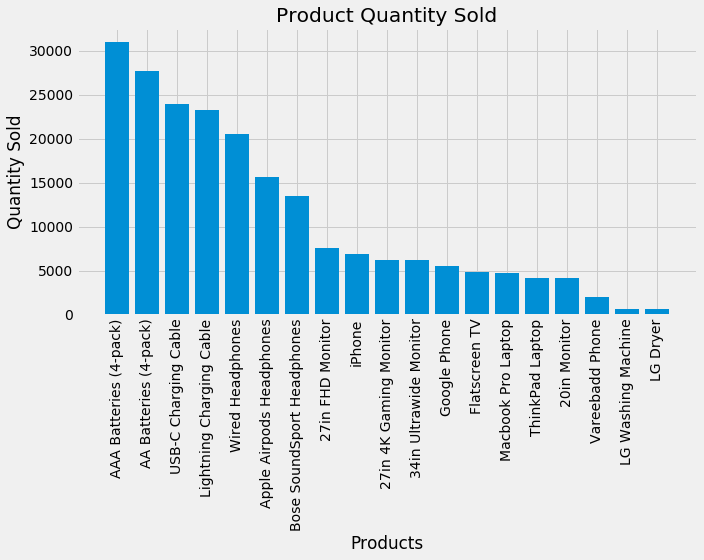

In [33]:
# Bar plot to find the product sold in the highest quantity

fig, ax = plt.subplots()

product = highest_sold_prod.index
qty_sold = highest_sold_prod

ax.bar(product, qty_sold)

ax.set_title('Product Quantity Sold')
ax.set_xlabel('Products')
ax.set_ylabel('Quantity Sold')

# To rotate x-axis tick-labels
plt.xticks(rotation=90)

# Increase figure size
fig.set_size_inches(10, 8)

plt.tight_layout()

### Answer 5a: The product sold in the highest quantity is: 'AAA Batteries (4-pack)'

***

## Question 5b: Why do you think the product from Answer 5a had the highest quantity sold?

It could be that 'AAA Batteries (4-pack)' sold in the highest quanity because they are one of the cheapest products. Let's test this hypothesis by **visualizing product quantities sold against their prices**, and see if there is a correlation between the two.

So, since we are trying to see the correlation between two variables (Product quantity sold & price), we might want to use a **scatter plot**.'

In [34]:
highest_sold_prod

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [35]:
product_prices = product_grp['Price Each'].mean().sort_values(ascending=False)
product_prices

Product
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
iPhone                         700.00
LG Dryer                       600.00
LG Washing Machine             600.00
Google Phone                   600.00
Vareebadd Phone                400.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Flatscreen TV                  300.00
Apple Airpods Headphones       150.00
27in FHD Monitor               149.99
20in Monitor                   109.99
Bose SoundSport Headphones      99.99
Lightning Charging Cable        14.95
Wired Headphones                11.99
USB-C Charging Cable            11.95
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price Each, dtype: float64

In [36]:
df_price_corr = pd.concat([highest_sold_prod, product_prices], axis='columns')
df_price_corr

,Quantity Ordered,Price Each
AAA Batteries (4-pack),31017,2.99
AA Batteries (4-pack),27635,3.84
USB-C Charging Cable,23975,11.95
Lightning Charging Cable,23217,14.95
Wired Headphones,20557,11.99
Apple Airpods Headphones,15661,150.00
Bose SoundSport Headphones,13457,99.99
27in FHD Monitor,7550,149.99
iPhone,6849,700.00
27in 4K Gaming Monitor,6244,389.99


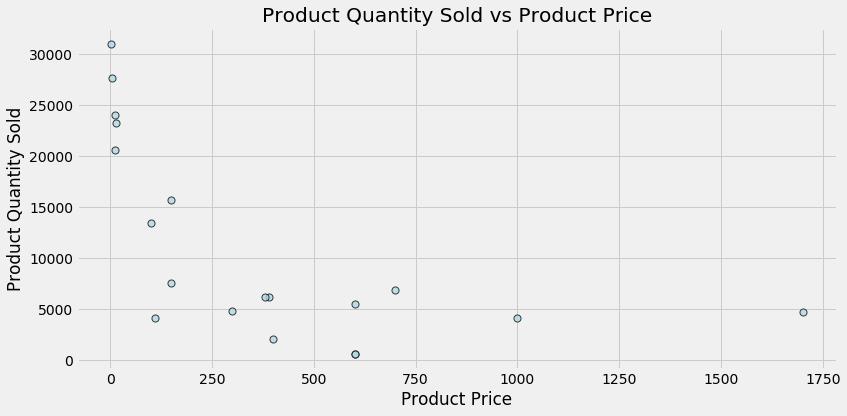

In [37]:
# Scatter plot to find correlation between product quantity sold and product price

fig, ax = plt.subplots()

qty_sold = df_price_corr['Quantity Ordered']
price = df_price_corr['Price Each']

labels = df_price_corr.index

ax.scatter(price, qty_sold, s=50, c='lightblue', edgecolor='black', linewidth=1, alpha=0.75)

ax.set_title('Product Quantity Sold vs Product Price')
ax.set_xlabel('Product Price')
ax.set_ylabel('Product Quantity Sold')

# Increase figure size
fig.set_size_inches(12, 6)

plt.tight_layout()

<p style="color:blue";> LEARNING POINT </p>

We could **annotate the points in scatter plot above with the product names** using `enumerate(<labels>)` and `ax.annotate(<text>, <x>, <y>)` 

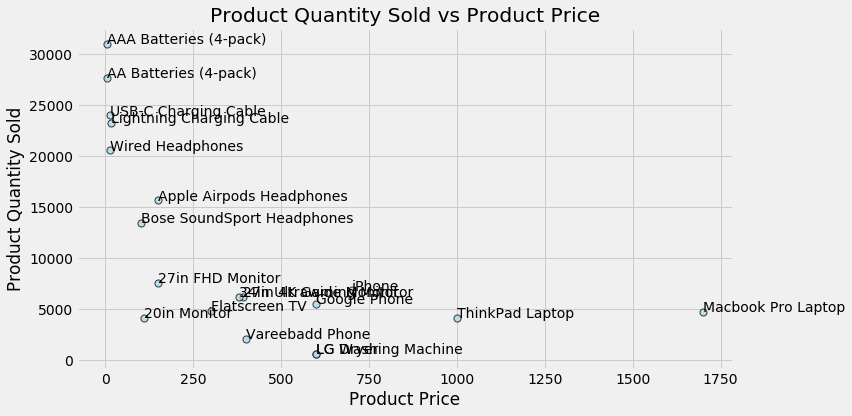

In [38]:
# Scatter plot to find correlation between product quantity sold and product price with annotations

fig, ax = plt.subplots()

qty_sold = df_price_corr['Quantity Ordered']
price = df_price_corr['Price Each']

labels = df_price_corr.index

ax.scatter(price, qty_sold, s=50, c='lightblue', edgecolor='black', linewidth=1, alpha=0.75)

ax.set_title('Product Quantity Sold vs Product Price')
ax.set_xlabel('Product Price')
ax.set_ylabel('Product Quantity Sold')

# Annotate the points with product names
for i, txt in enumerate(labels):
    ax.annotate(txt, (price[i], qty_sold[i]))

# Increase figure size
fig.set_size_inches(12, 6)

plt.tight_layout()

### Answer 5b: Based on the scatter plot above, there is a *correlation* between product price and quantity sold. However, *correlation does NOT mean causation*.